In [4]:
import numpy as np
from matplotlib import pyplot as plt
#import h5py

import time, os, re, sys

from sklearn import utils
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split, ParameterGrid

# K-fold validation
from sklearn.model_selection import RepeatedStratifiedKFold

# PCA
from sklearn.decomposition import PCA

# Scoring
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import imblearn
from sklearn.metrics import accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
import pickle

with open(r'../../Results/gr_DecisionTree_prova.pkl', 'rb') as file:
 
    results = pickle.load(file)
 
    
df = pd.DataFrame(results.cv_results_)

print(df.columns)
df.tail()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_f1_macro',
       'split1_test_f1_macro', 'split2_test_f1_macro', 'split3_test_f1_macro',
       'split4_test_f1_macro', 'split5_test_f1_macro', 'split6_test_f1_macro',
       'split7_test_f1_macro', 'split8_test_f1_macro', 'split9_test_f1_macro',
       'mean_test_f1_macro', 'std_test_f1_macro', 'rank_test_f1_macro',
       'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy',
       'split3_test_Accuracy', 'split4_test_Accuracy', 'split5_test_Accuracy',
       'split6_test_Accuracy', 'split7_test_Accuracy', 'split8_test_Accuracy',
       'split9_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy',
       'rank_test_Accuracy', 'split0_test_AUC', 'split1_test_AUC',
       'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC',
       'split5_test_AUC', 'split6

c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
499      24.464769      0.763376         0.183063        0.001768   
500      23.319605      0.611989         0.182311        0.001882   
501      23.013901      0.676202         0.186186        0.013782   
502      22.823288      0.750437         0.189059        0.020495   
503      22.682838      0.443279         0.189842        0.006164   

    param_criterion param_max_depth param_min_samples_leaf  \
499         entropy              50                     50   
500         entropy              50                    100   
501         entropy              50                    100   
502         entropy              50                    100   
503         entropy              50                    100   

    param_min_samples_split  \
499                      20   
500                       2   
501                       5   
502                      10   
503                      20   

                                                params  split0_test_f1_macro  \
499  {'criterion': 'entropy', 'max_depth': 50, 'min...              0.991323   
500  {'criterion': 'entropy', 'max_depth': 50, 'min...              0.990697   
501  {'criterion': 'entropy', 'max_depth': 50, 'min...              0.990706   
502  {'criterion': 'entropy', 'max_depth': 50, 'min...              0.990697   
503  {'criterion': 'entropy', 'max_depth': 50, 'min...              0.990697   

     ...  split3_test_AUC  split4_test_AUC  split5_test_AUC  split6_test_AUC  \
499  ...         0.996284         0.996314         0.996322         0.995981   
500  ...         0.996240         0.996299         0.996275         0.996103   
501  ...         0.996272         0.996286         0.996275         0.996108   
502  ...         0.996235         0.996307         0.996274         0.996090   
503  ...         0.996275         0.996294         0.996222         0.996076   

     split7_test_AUC  split8_test_AUC  split9_test_AUC  mean_test_AUC  \
499         0.996292         0.996340         0.996271       0.996271   
500         0.996171         0.996332         0.996327       0.996275   
501         0.996126         0.996342         0.996325       0.996278   
502         0.996169         0.996330         0.996331       0.996276   
503         0.996186         0.996331         0.996337       0.996273   

     std_test_AUC  rank_test_AUC  
499      0.000115             22  
500      0.000109             18  
501      0.000107             13  
502      0.000108             16  
503      0.000107             21  

[5 rows x 48 columns]

In [6]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_best = []
for metric in scoring:
    idx_best.append(df[f'rank_test_{metric}'].idxmin())


In [8]:

    
if idx_best.count(idx_best[0]) == len(idx_best):
    print("########## We have a winner! ##########")
    print("The best classificator is:")
    print(df.loc[idx_best[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][idx_best[0]]*100:5f}, std = {df['std_test_' + metric][idx_best[0]]*100:4f}")
else:
    print("Oh-oh there are more best estimators...")
    for i, met in zip(idx_best, scoring):
        print(f"Best classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][i]*100:.4f}, std = {df['std_test_' + metric][i]*100:.4f}")




Oh-oh there are more best estimators...
Best classificator for the metric f1_macro - idx 456
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Scorer results:
- f1_macro --> Mean = 99.4324, std = 0.0069
- Accuracy --> Mean = 99.4324, std = 0.0069
- AUC --> Mean = 99.4365, std = 0.0096
Best classificator for the metric Accuracy - idx 456
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Scorer results:
- f1_macro --> Mean = 99.4324, std = 0.0069
- Accuracy --> Mean = 99.4324, std = 0.0069
- AUC --> Mean = 99.4365, std = 0.0096
Best classificator for the metric AUC - idx 332
{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 100, 'min_samples_split': 2}
Scorer results:
- f1_macro --> Mean = 99.0502, std = 0.0224
- Accuracy --> Mean = 99.0503, std = 0.0224
- AUC --> Mean = 99.6364, std = 0.0100


In [59]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_worst = []
for metric in scoring:
    idx_worst.append(df[f'rank_test_{metric}'].idxmax())
    
    
if idx_worst.count(idx_worst[0]) == len(idx_worst):
    print("########## We have a loser! ##########")
    print("The worst classificator is:")
    print(df.loc[idx_worst[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][idx_worst[0]]:5f}, std = {df['std_test_' + metric][idx_worst[0]]:4f}")
else:
    print("Oh-oh there are more worst estimators...")
    for i, met in zip(idx_worst, scoring):
        print(f"Worst classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][i]}, std = {df['std_test_' + metric][i]}")



########## We have a loser! ##########
The worst classificator is:
{'criterion': 'log_loss', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Scorer results:
- f1_macro --> Mean = 0.987551, std = 0.000114
- Accuracy --> Mean = 0.987552, std = 0.000114
- AUC --> Mean = 0.987552, std = 0.000114


In [40]:
dati = np.load("../Dataset/dati.npz")
X_raw = dati["X"]
y_raw = dati["y"]

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_raw, y_raw)

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

scaler.fit(X_raw)
X_scaled_raw = scaler.transform(X_raw)

# Applico la PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


thrEV = .95     # Soglia Explained Variance per pruning componenti

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature} features ")

pca = PCA()
pca.fit(X_scaled_raw)
X_pca_raw = pca.transform(X_scaled_raw)

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature_raw = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature_raw} features ")


# Pruno tenendo solo le prime componenti più informative
X_pruned = X_pca[:,:idxLastFeature]     # Pruno
X_pruned_raw = X_pca_raw[:,:idxLastFeature]     # Pruno


To have 95.0 % of Explaied Variance, we need 7 features 
To have 95.0 % of Explaied Variance, we need 8 features 


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y, test_size=0.2, random_state=0)


In [55]:
idx = [idx_best[0], idx_best[2]]

y_pred = []
y_pred_proba = []

y_pred_raw = []
y_pred_proba_raw = []

for i in idx:
    params = df.loc[i]['params']
    clf = DecisionTreeClassifier(**params)
    clf = clf.fit(X_train, y_train)
    y_pred.append(clf.predict(X_test))
    y_pred_proba.append(clf.predict_proba(X_test)[:,1])
    y_pred_raw.append(clf.predict(X_pruned_raw))
    y_pred_proba_raw.append(clf.predict_proba(X_pruned_raw)[:,1])


In [60]:
cf_matrix = []

print('#### Dataset resamplato ###')


for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix.append(metrics.confusion_matrix(y_test, y_pred[i]))
    accuracy        =   metrics.accuracy_score(y_test, y_pred[i])
    precision       =   metrics.precision_score(y_test, y_pred[i])
    recall          =   metrics.recall_score(y_test, y_pred[i])
    f1              =   metrics.f1_score(y_test, y_pred[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")

print('#### Dataset originale ###')

cf_matrix_raw = []

for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix_raw.append(metrics.confusion_matrix(y_raw, y_pred_raw[i]))
    accuracy        =   metrics.accuracy_score(y_raw, y_pred_raw[i])
    precision       =   metrics.precision_score(y_raw, y_pred_raw[i])
    recall          =   metrics.recall_score(y_raw, y_pred_raw[i])
    f1              =   metrics.f1_score(y_raw, y_pred_raw[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")



#### Dataset resamplato ###
For idx = 456
-- accuracy = 0.9943
-- precision = 0.9906
-- recall = 0.9980
-- f1 = 0.9943
For idx = 332
-- accuracy = 0.9905
-- precision = 0.9828
-- recall = 0.9985
-- f1 = 0.9906
#### Dataset originale ###
For idx = 456
-- accuracy = 0.9138
-- precision = 0.0000
-- recall = 0.0015
-- f1 = 0.0001
For idx = 332
-- accuracy = 0.7650
-- precision = 0.0000
-- recall = 0.0000
-- f1 = 0.0000


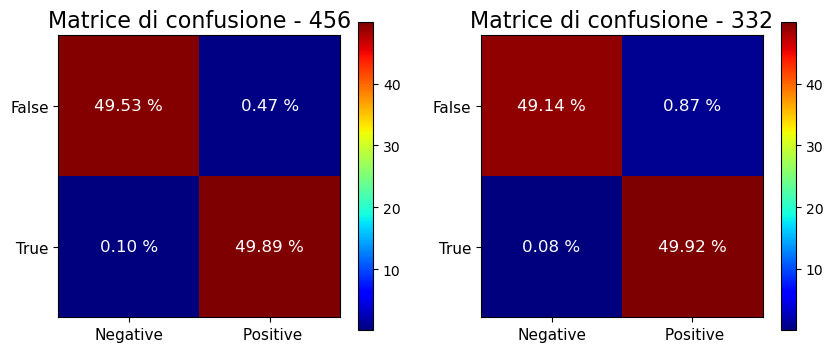

In [68]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)

ax = ax.flatten()

for k, mat in enumerate(cf_matrix):

    myConfMat = np.array(mat)
    myConfMat = myConfMat/np.sum(myConfMat)
    myConfMat *= 100



    # Plotto la matrice di covarianza
    im = ax[k].imshow(myConfMat, cmap = "jet", origin = "upper")

    ax[k].set_title(f"Matrice di confusione - {idx[k]}", fontsize = 16)

    # Stampo i valori sulle celle
    for i in range(myConfMat.shape[0]):
        for j in range(myConfMat.shape[1]):
            text = ax[k].text(j, i, f"{myConfMat[i, j]:.2f} %",
                        ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
            
    ax[k].set_xticks((0,1))
    ax[k].set_xticklabels(['Negative',' Positive'], rotation='horizontal', fontsize=11)

    ax[k].set_yticks((0,1))
    ax[k].set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


    # Disegno la colorbar
    fig.colorbar(im)


plt.show()

fig.savefig("../Relazione/Grafici//DecisionTree-conf-matrix.eps", format = "eps", bbox_inches = "tight")


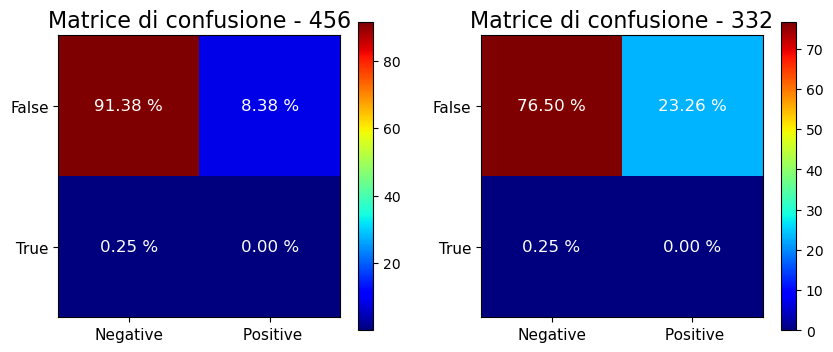

In [69]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)

ax = ax.flatten()

for k, mat in enumerate(cf_matrix_raw):

    myConfMat = np.array(mat)
    myConfMat = myConfMat/np.sum(myConfMat)
    myConfMat *= 100



    # Plotto la matrice di covarianza
    im = ax[k].imshow(myConfMat, cmap = "jet", origin = "upper")

    ax[k].set_title(f"Matrice di confusione - {idx[k]}", fontsize = 16)

    # Stampo i valori sulle celle
    for i in range(myConfMat.shape[0]):
        for j in range(myConfMat.shape[1]):
            text = ax[k].text(j, i, f"{myConfMat[i, j]:.2f} %",
                        ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
            
    ax[k].set_xticks((0,1))
    ax[k].set_xticklabels(['Negative',' Positive'], rotation='horizontal', fontsize=11)

    ax[k].set_yticks((0,1))
    ax[k].set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


    # Disegno la colorbar
    fig.colorbar(im)


plt.show()

fig.savefig("../Relazione/Grafici//DecisionTree-conf-matrix-raw.eps", format = "eps", bbox_inches = "tight")


In [75]:
nrocstep = 100000                            # Numero punti per curva ROC
xROC = np.linspace(0,1,nrocstep)           # Vettore su cui interpolare curva ROC
yROC_lst = []

auc = []
for i,y in enumerate(y_pred_proba):
    # *** ROC Curve ***

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y)

    # Creo un'interpolazione denza per miglior calcolo aree
    yROC = np.interp(xROC, fpr, tpr)
    yROC_lst.append(yROC)
    #myAuc = metrics.auc(fpr, tpr)
    myAUC = metrics.auc(xROC, yROC)
    auc.append(myAUC)
    print(f"{idx[i]} --> AUC = {myAUC}")




456 --> AUC = 0.9943437626818143
332 --> AUC = 0.9963790111162895


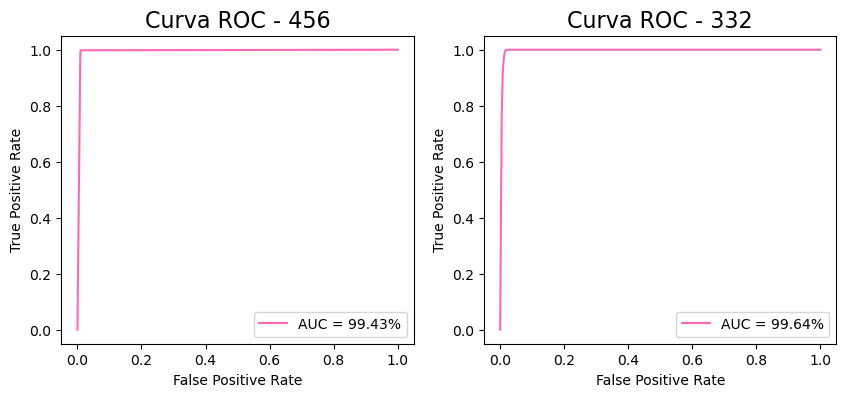

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [81]:
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)

ax = ax.flatten()


for i, yROC in enumerate(yROC_lst):
    
    #create ROC curve
    ax[i].plot(xROC,yROC, c  = "hotpink", label = f"AUC = {auc[i]*100:.2f}%")
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_title(f"Curva ROC - {idx[i]}", fontsize = 16)
    ax[i].legend()


plt.show()

fig.savefig("../Relazione/Grafici/DecisionTree-roc-curve.eps", format = "eps", bbox_inches = "tight")



In [80]:
# nrocstep = 100000                            # Numero punti per curva ROC
# xROC = np.linspace(0,1,nrocstep)           # Vettore su cui interpolare curva ROC
# yROC_lst = []
# for i,y in enumerate(y_pred_proba_raw):
#     # *** ROC Curve ***

#     fpr, tpr, thresholds = metrics.roc_curve(y_raw, y)

#     # Creo un'interpolazione denza per miglior calcolo aree
#     yROC = np.interp(xROC, fpr, tpr)
#     yROC_lst.append(yROC)
#     #myAuc = metrics.auc(fpr, tpr)
#     myAUC = metrics.auc(xROC, yROC)
#     print(f"{idx[i]} --> AUC = {myAUC}")

# for i, yROC in enumerate(yROC_lst):

#     #create ROC curve
#     plt.plot(xROC,yROC, c  = "hotpink")
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
